<a href="https://colab.research.google.com/github/ilaesm/revenueregression/blob/main/AMKRrevenueregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/rev-linreg.csv', header = None).to_numpy()[:, :2]

In [ ]:
print(data)

[[2008.    2658.602]
 [2009.    2179.109]
 [2010.    2939.483]
 [2011.    2776.359]
 [2012.    2759.546]
 [2013.    2956.45 ]
 [2014.    3129.44 ]
 [2015.    2884.603]
 [2016.    3927.849]
 [2017.    4207.031]
 [2018.    4316.466]
 [2019.    4052.65 ]
 [2020.    5050.589]
 [2021.    6138.329]
 [2022.    7009.   ]]


In [ ]:
X_train = data[:int(.9*data.shape[0]), 0].reshape(-1, 1)
X_test = data[int(.9*data.shape[0]):, 0].reshape(-1, 1)
y_train = data[:int(.9*data.shape[0]), 1]
y_test = data[int(.9*data.shape[0]):, 1]
X_fu = np.arange(start=2023, stop = 2029).reshape(-1, 1)

In [ ]:
poly = PolynomialFeatures(2)
poly.fit(X_train)
poly_reg_model = LinearRegression()

In [ ]:
features_train = poly.transform(X_train)
poly_reg_model.fit(features_train, y_train)
y_pred_train = poly_reg_model.predict(features_train)

In [ ]:
features_test = poly.transform(X_test)
y_pred_test = poly_reg_model.predict(features_test)

In [ ]:
features_fu = poly.transform(X_fu)
y_pred_fu = poly_reg_model.predict(features_fu)

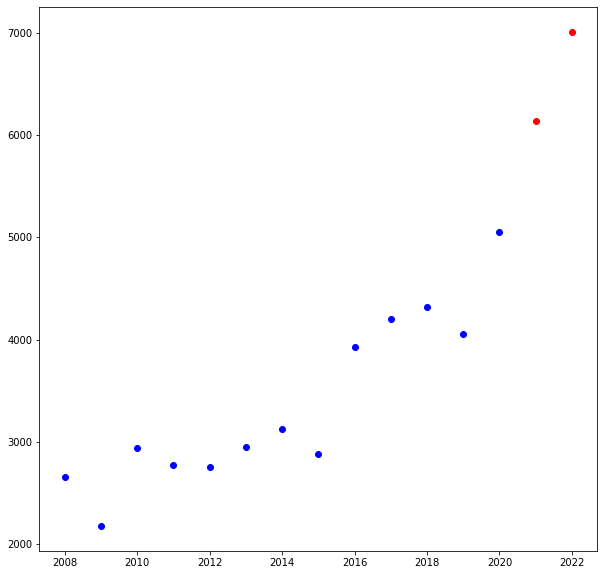

In [ ]:
plt.figure(figsize = (10, 10))
plt.scatter(X_train, y_train, c = 'b')
# plt.plot(X_train, y_pred_train, c = 'b')
plt.scatter(X_test, y_test, c = 'r')
# plt.plot(X_test, y_pred_test, c = 'r')
# plt.plot(X_fu, y_pred_fu, c = 'y')

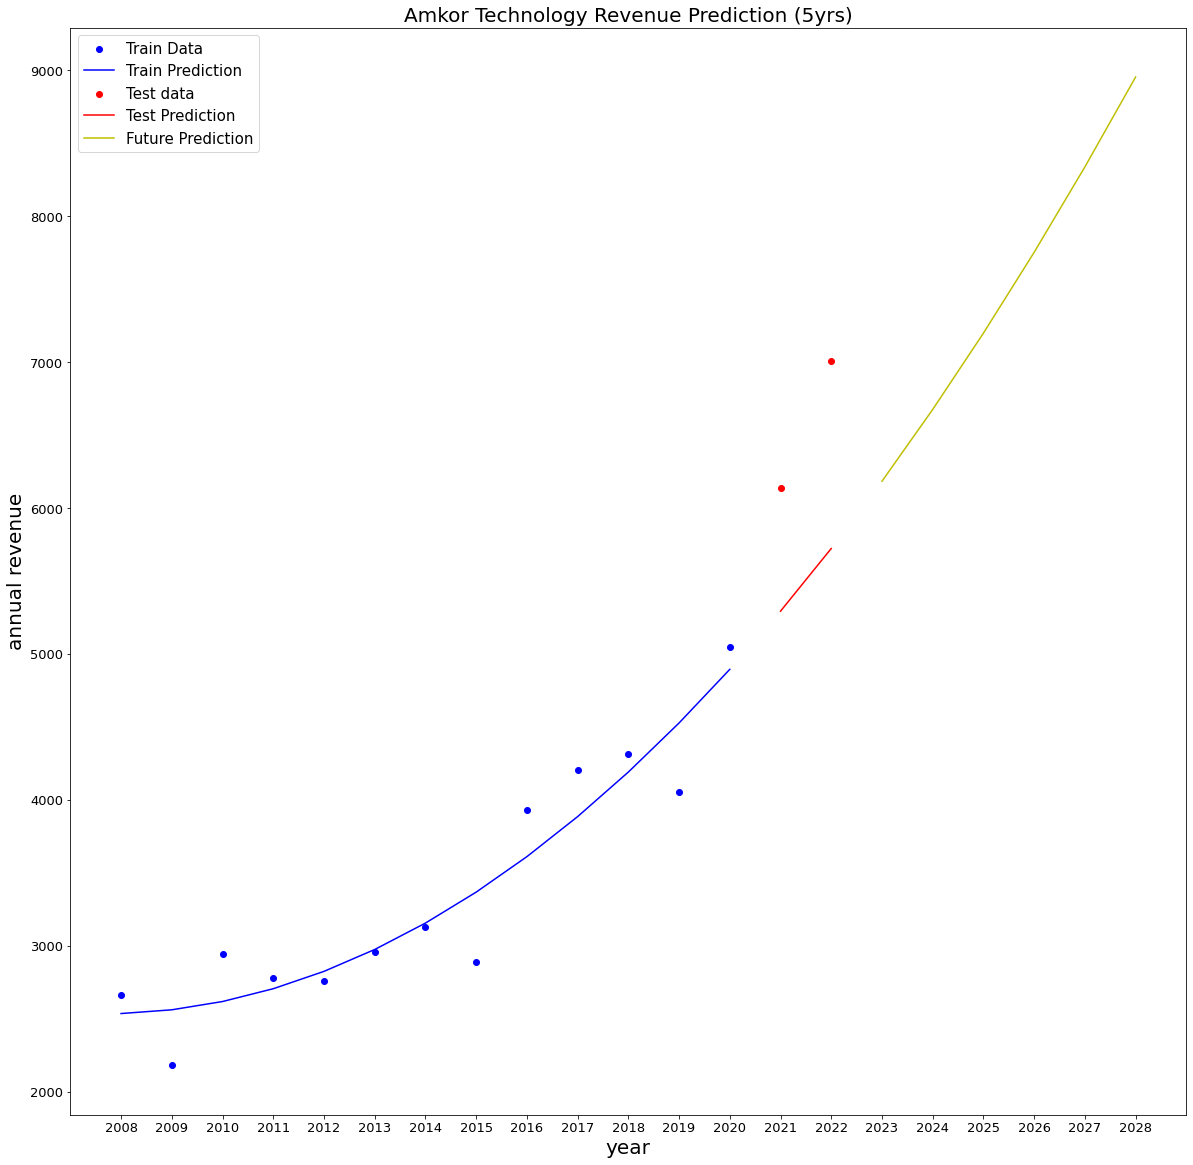

In [ ]:
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13) 
plt.figure(figsize = (20, 20))
plt.scatter(X_train, y_train, c = 'b')
plt.plot(X_train, y_pred_train, c = 'b')
plt.scatter(X_test, y_test, c = 'r')
plt.plot(X_test, y_pred_test, c = 'r')
plt.plot(X_fu, y_pred_fu, c = 'y')
plt.xticks(np.concatenate((X_train, X_test, X_fu)).ravel())
plt.xlabel('year', fontsize = 20)
plt.ylabel('annual revenue', fontsize = 20)
plt.title('Amkor Technology Revenue Prediction (5yrs)', fontsize = 20)
plt.legend(['Train Data', 'Train Prediction', 'Test data', 'Test Prediction', 'Future Prediction'], fontsize = 15)
plt.savefig('/content/drive/MyDrive/rev-linreg.png')

In [ ]:
print(y_pred_fu)

[6183.42518724 6675.45064881 7198.57171477 7752.78838515 8338.1006599
 8954.50853904]
